## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

## Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Getting some informations about the dataset

In [3]:
# printing the shape of the training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# Printing a random row from the training data and its label
np.set_printoptions(linewidth=120)
random_number_train = random.randint(0, X_train.shape[0])
print("The label: ", y_train[random_number_train])
print(X_train[random_number_train])

The label:  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   2   5   5   3   5   7   5   2   0  66  28   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  70  32   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  17  18  23  38  42  35  24 105 105   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   1   0 

In [5]:
# Printing a random row from the test data and its label
random_number_test = random.randint(0, X_test.shape[0])
print("The label: ", y_test[random_number_test])
print(X_test[random_number_test])

The label:  7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

The label:  9


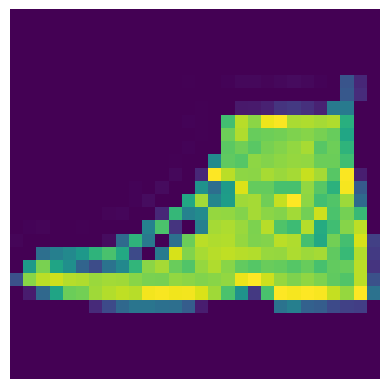

In [6]:
# Visualizing a random image from the training data and its label
print("The label: ", y_train[random_number_train])
plt.imshow(X_train[random_number_train])
plt.axis('off')
plt.show()

The label:  7


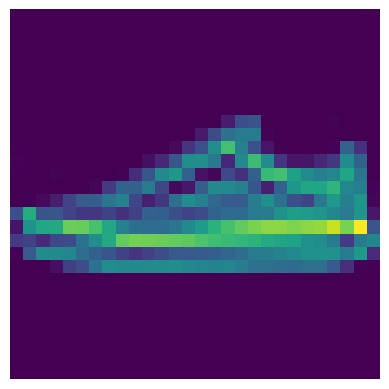

In [7]:
# Visualizing a random image from the test data and its label
print("The label: ", y_test[random_number_test])
plt.imshow(X_test[random_number_test])
plt.axis('off')
plt.show()

## Preprocessing the data

In [8]:
# Normalizing the features (of the training and test data)
X_train = X_train/255
X_test = X_test/255

## Building the CNN model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Compiling the model

In [11]:
model.compile(optimizer="adam",
              loss="SparseCategoricalCrossentropy",
              metrics=["accuracy"])

## Training the model

In [12]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4709 - accuracy: 0.8298 - val_loss: 0.3693 - val_accuracy: 0.8676
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3164 - accuracy: 0.8849 - val_loss: 0.3260 - val_accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2710 - accuracy: 0.9004 - val_loss: 0.2740 - val_accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2410 - accuracy: 0.9115 - val_loss: 0.2590 - val_accuracy: 0.9045
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2171 - accuracy: 0.9196 - val_loss: 0.2765 - val_accuracy: 0.9009


## Evaluating the model

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print("The accuracy: ", accuracy)
print("The loss: ", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.9009
The accuracy:  0.9009000062942505
The loss:  0.2765420377254486


## Visualizing the accuracy and the loss (for both training and test data)

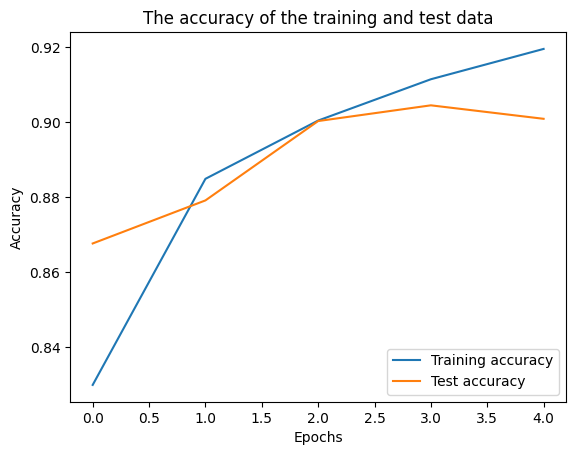

In [14]:
# Visualizing the accuracy of the training and test data
plt.title("The accuracy of the training and test data")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training accuracy", "Test accuracy"], loc='lower right')
plt.show()

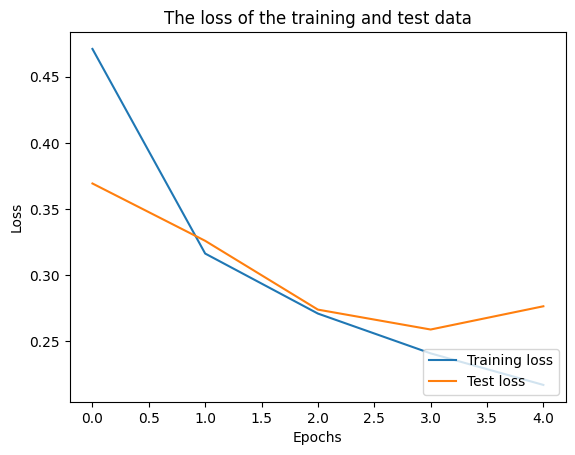

In [15]:
# Visualizing the loss of the training and test data
plt.title("The loss of the training and test data")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Training loss", "Test loss"], loc='lower right')
plt.show()

## Building a predictive system

In [31]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Using the OpenCV library

In [58]:
import cv2

img_path = input("Enter the path of your image: ")
img = cv2.imread(img_path)
resized_img = cv2.resize(img, (28,28))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
final_img = gray_img.reshape((1,28,28,1))
final_img = final_img/255
prediction = model.predict(final_img)
print(prediction)
pred_class = classes[np.argmax(prediction)]
print("The predicted class is: ", pred_class)

Enter the path of your image: /content/dd.jpg
1/1 [==============================] - 0s 17ms/step
[[4.4165485e-02 9.9030102e-04 7.2489884e-03 6.1380509e-03 4.2297249e-04 2.6875961e-05 1.4667350e-02 9.3264956e-05
  9.2279989e-01 3.4467829e-03]]
The predicted class is:  Bag


### Using the PIL library (Python Imaging Library)

In [60]:
from PIL import Image

img_path = input("Enter the path of your image: ")
img = Image.open(img_path)
resized_img = img.resize((28,28))
grayscale_img = resized_img.convert('L')
img_array = np.array(grayscale_img)
final_img = img_array.reshape((1,28,28,1))
final_img = final_img/255
prediction = model.predict(final_img)
print(prediction)
pred_class = classes[np.argmax(prediction)]
print("The predicted class is: ", pred_class)

Enter the path of your image: /content/dd.jpg
1/1 [==============================] - 0s 18ms/step
[[1.1234622e-01 1.9279071e-03 1.3584243e-02 5.3749452e-03 3.0360490e-04 2.4410059e-05 1.8760560e-02 1.8162459e-04
  8.4093732e-01 6.5592141e-03]]
The predicted class is:  Bag


## Saving the trained model

In [42]:
model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
